In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a=pd.read_csv('milknew[1].csv')
a

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
a.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

C:\Users\mukth\AppData\Local\Temp\ipykernel_19776\3595583958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(),annot=True)


<Axes: >

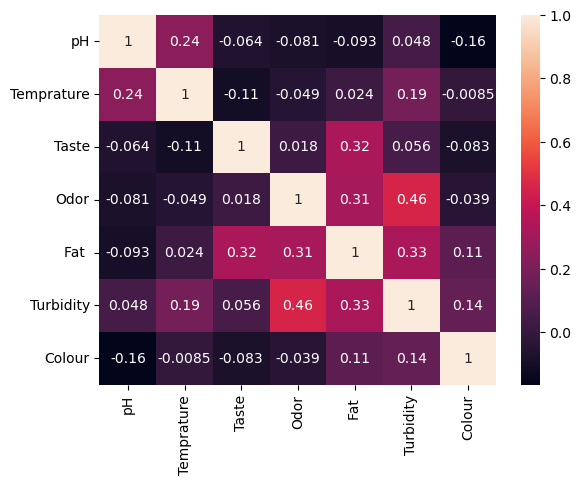

In [4]:
sns.heatmap(a.corr(),annot=True)

In [5]:
a['Grade']=a['Grade'].replace(('high','medium','low'),(3,2,1))
a.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,3
1,6.6,36,0,1,0,1,253,3
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [6]:
a['Grade'].unique()

array([3, 1, 2], dtype=int64)

In [7]:
x=a.iloc[:,:-1]
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [8]:
y=a.iloc[:,-1]
y

0       3
1       3
2       1
3       1
4       2
       ..
1054    2
1055    3
1056    1
1057    3
1058    1
Name: Grade, Length: 1059, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=362)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((847, 7), (212, 7), (847,), (212,))

In [11]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(xtrain,ytrain)

SVC(kernel='linear')

In [12]:
ypred=svm.predict(xtest)
ypred

array([3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1, 3, 2, 1,
       3, 2, 3, 2, 2, 1, 1, 1, 3, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1,
       3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 1, 3, 1,
       2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 3, 1,
       1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 2, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 3, 1, 3, 2,
       3, 2, 1, 2, 3, 3, 1, 1, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3, 1, 3, 1, 3,
       1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 2, 2, 2, 1, 3, 2, 1, 1,
       2, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 3, 1], dtype=int64)

In [13]:
ytest

269    3
508    3
381    1
210    2
388    1
      ..
713    2
351    1
618    1
923    3
777    1
Name: Grade, Length: 212, dtype: int64

In [14]:
svm.score(xtest,ytest)

0.8820754716981132

<Axes: >

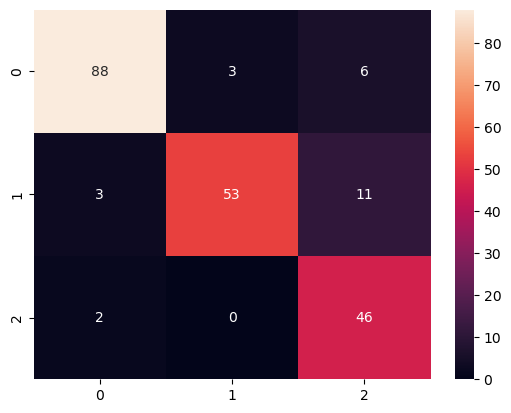

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [16]:
import pickle as pkl

In [17]:
filename='milknew[1].sav'
pkl.dump(svm,open(filename,'bw'))

SVC(kernel='linear')

In [19]:
new_data = np.array([6.6,35,1,0,1,0,254]).reshape(1,-1)
svm.predict(new_data)

C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [20]:
import gradio as gd

In [21]:
print(a.columns)

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [22]:
def Grade(pH, Temprature, Taste, Odor, Fat , Turbidity, Colour):
    x=np.array([pH, Temprature, Taste, Odor, Fat , Turbidity, Colour])
    prediction=svm.predict(x.reshape(1,-1))
    if prediction==3:
        return 'High'
    elif prediction==2:
        return 'Medium'
    else:
        return 'Low'

In [23]:
app=gd.Interface(fn=Grade,
                inputs=[gd.inputs.Number(label='Enter the pH'),
                        gd.inputs.Number(label='Enter the Temperature'),
                        gd.inputs.Radio(['0','1'],label='Enter the Taste'),
                        gd.inputs.Radio(['0','1'],label='Enter the Odor'),
                        gd.inputs.Radio(['0','1'],label='Enter the Fat'),
                        gd.inputs.Radio(['0','1'],label='Enter the Turbidity'),
                        gd.inputs.Number(label='Enter the colour')],
                outputs=gd.outputs.Label(),
                title='Developing an Ml model for predicting the Quality of milk')

C:\Users\mukth\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\mukth\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\mukth\anaconda3\lib\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\mukth\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\mukth\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.


IMPORTANT: You are using gradio version 3.24.1, however version 4.29.0 is available, please upgrade.
--------


In [24]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
